In [127]:
import networkx as nx
from parse import read_input_file, write_output_file
from utils import is_valid_network, average_pairwise_distance_fast
import sys

In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [132]:
class DisjointSet:
    def __init__(self, vertices):
        self.vertices = [[v,0] for v in vertices]            
#         self.vertexset = [v for v in vertices]
    
#     def add(self, vertex):
#         if self.contains(vertex):
#             return False
#         self.vertices.append([vertex, 0])
#         return True
    
    def contains(self, vertex):
        return vertex in [x[0] for x in self.vertices]
    
    def find(self, x):
        if x != self.vertices[x][0]:
            self.vertices[x][0] = self.find(self.vertices[x][0])
        return self.vertices[x][0]

    def union(self, x, y):
        rootx = self.find(x)
        rooty = self.find(y)
        if self.vertices[rootx][1] > self.vertices[rooty][1]:
            self.vertices[rooty][0] = rootx
        else:
            self.vertices[rootx][0] = rooty
            if self.vertices[rootx][1] == self.vertices[rooty][1]:
                self.vertices[rooty][1] += 1

In [141]:
ds = DisjointSet(5)
ds.union(1,2)
ds.find(1) == ds.find(2)
ds.union(2,4)
ds.find(4) == ds.find(3)

False

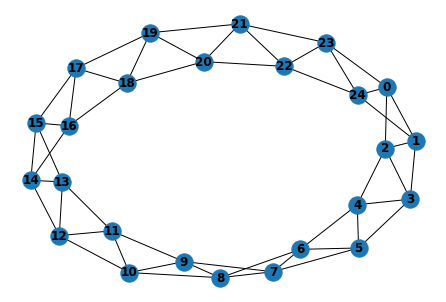

In [177]:
G = read_input_file('inputs/small-14.in')
nx.draw(G, with_labels=True, font_weight='bold')

In [171]:
G.edges.data('weight')

EdgeDataView([(0, 1, 1.0), (0, 2, 5.0), (0, 23, 5.0), (0, 24, 1.0), (1, 2, 1.0), (1, 3, 5.0), (1, 24, 5.0), (2, 3, 1.0), (2, 4, 5.0), (23, 21, 5.0), (23, 22, 1.0), (23, 24, 1.0), (24, 22, 5.0), (3, 4, 1.0), (3, 5, 5.0), (4, 5, 1.0), (4, 6, 5.0), (5, 6, 1.0), (5, 7, 5.0), (6, 7, 1.0), (6, 8, 5.0), (7, 8, 1.0), (7, 9, 5.0), (8, 9, 1.0), (8, 10, 5.0), (9, 10, 1.0), (9, 11, 5.0), (10, 11, 1.0), (10, 12, 5.0), (11, 12, 1.0), (11, 13, 5.0), (12, 13, 1.0), (12, 14, 5.0), (13, 14, 1.0), (13, 15, 5.0), (14, 15, 1.0), (14, 16, 5.0), (15, 16, 1.0), (15, 17, 5.0), (16, 17, 1.0), (16, 18, 5.0), (17, 18, 1.0), (17, 19, 5.0), (18, 19, 1.0), (18, 20, 5.0), (19, 20, 1.0), (19, 21, 5.0), (20, 21, 1.0), (20, 22, 5.0), (21, 22, 1.0)])

In [184]:
list(G.edges([1]))


[(1, 0), (1, 2), (1, 3), (1, 24)]

In [197]:
G.adj[1]

AtlasView({0: {'weight': 1.0}, 2: {'weight': 1.0}, 3: {'weight': 5.0}, 24: {'weight': 5.0}})

In [199]:
total = 0
for i in range(len(list(G.edges([1])))):
    total += G.edges[list(G.edges([1]))[i]]['weight']
    print(total)

1.0
2.0
7.0
12.0


In [173]:
df = pd.DataFrame(np.array(G.degree(G.nodes()))).sort_values(by=1, ascending=False)
# df1 = pd.DataFrame(np.array(G.edges.data('weight')))
df

,0,1
0,0,4
13,11,4
23,21,4
22,20,4
21,19,4
20,18,4
19,17,4
18,16,4
17,15,4
16,14,4


In [178]:
def sort_deg(G):
    df = pd.DataFrame(np.array(G.degree(G.nodes()))).sort_values(by=1, ascending=False)
    return df

In [65]:
def solve(G):
    """
    Args:
        G: networkx.Graph

    Returns:
        T: networkx.Graph
    """
    tree = DisjointSet(0)
    seen = set([])
    degrees = sort_deg(G)
    for v in degrees[0]:
        
    